<a href="https://colab.research.google.com/github/Ashish47-Aluwala/Data_Analysis_using_python_3-1/blob/main/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
completion_times = np.array([22, 28, 35, 24, 30, 32, 18, 26, 40, 29])


In [3]:
threshold = 30

def categorize_students(times, threshold=30):
    categories = []
    for t in times:
        if t < threshold - 5:   # Fast Learner
            categories.append("Fast Learner")
        elif threshold - 5 <= t <= threshold:  # On Time
            categories.append("On Time")
        else:   # Needs Support
            categories.append("Needs Support")
    return pd.Categorical(categories,
                          categories=["Fast Learner", "On Time", "Needs Support"],
                          ordered=True)

categories = categorize_students(completion_times, threshold)


In [4]:
print("Length of data:", len(completion_times))
print("Data type of completion times:", completion_times.dtype)
print("Categories data type:", type(categories))
print("Categories structure:", categories.categories)

# Frequency & proportion
freq = pd.Series(categories).value_counts().sort_index()
prop = pd.Series(categories).value_counts(normalize=True).sort_index()
print("\nFrequency of each learner type:\n", freq)
print("\nProportion of each learner type:\n", prop)


Length of data: 10
Data type of completion times: int64
Categories data type: <class 'pandas.core.arrays.categorical.Categorical'>
Categories structure: Index(['Fast Learner', 'On Time', 'Needs Support'], dtype='object')

Frequency of each learner type:
 Fast Learner     3
On Time          4
Needs Support    3
Name: count, dtype: int64

Proportion of each learner type:
 Fast Learner     0.3
On Time          0.4
Needs Support    0.3
Name: proportion, dtype: float64


In [5]:
mean_val = np.mean(completion_times)
median_val = np.median(completion_times)
std_val = np.std(completion_times, ddof=1)  # sample std

print("\nMean:", mean_val)
print("Median:", median_val)
print("Standard Deviation:", std_val)

# Pass rate: Fast Learner or On Time
passed = np.isin(categories, ["Fast Learner", "On Time"]).sum()
pass_rate = passed / len(completion_times)
print("\nPass Rate:", pass_rate)



Mean: 28.4
Median: 28.5
Standard Deviation: 6.397916327472041

Pass Rate: 0.7


In [6]:
def reclassify_and_plot(times, threshold):
    new_categories = categorize_students(times, threshold)

    # Frequency for visualization
    freq = pd.Series(new_categories).value_counts().sort_index()

    # Bar chart
    plt.figure(figsize=(6,4))
    freq.plot(kind="bar", color=["green", "blue", "red"])
    plt.title(f"Student Performance Distribution (Threshold = {threshold} hrs)")
    plt.xlabel("Category")
    plt.ylabel("Number of Students")
    plt.xticks(rotation=0)
    plt.show()

    return new_categories, freq


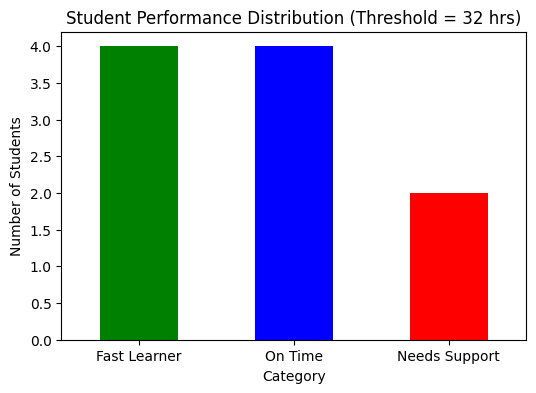

In [8]:
new_categories, new_freq = reclassify_and_plot(completion_times,threshold=32)